# Acerca de la Tarea \#7

# Acerca del problema \#7

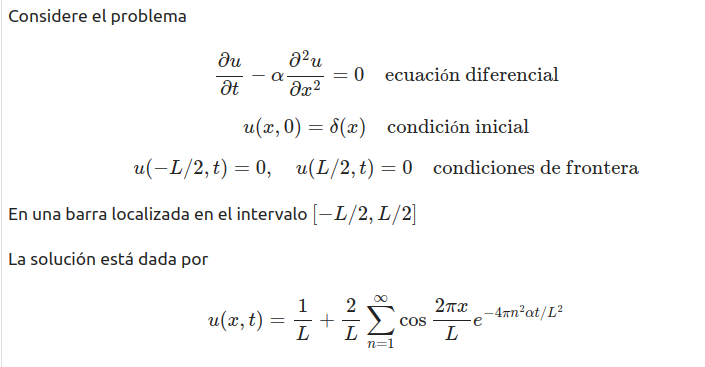

La solucion no es la de arriba:

La solucion es:

$$u(x,t) = \frac{2}{L} \sum_{n=1}^{\infty} \sin \frac{  n \pi}{2} \sin \left ( \frac{n \pi}{L} \left ( x + \frac{L}{2}  \right )   \right ) \mathrm{e}^{- \alpha \left ( \frac{n \pi}{L}   \right )^2 t} $$



# Implementacion numerica de la tarea # 7

In [1]:
import numpy as np
from numpy import pi, sin, exp
import matplotlib.pyplot as plt

def fterm(t,x,alpha,L,nterms):
    return sum( sin(n*pi/2)*sin(n*pi/L*(x+L/2))*exp(-alpha*(n*pi/L)**2*t) \
               for n in range(1,nterms ))

In [2]:
nterms=100

def u(x,t,L=1, alpha=1, nterms=nterms):
    return 2/L*fterm(t,x,alpha,L,nterms)

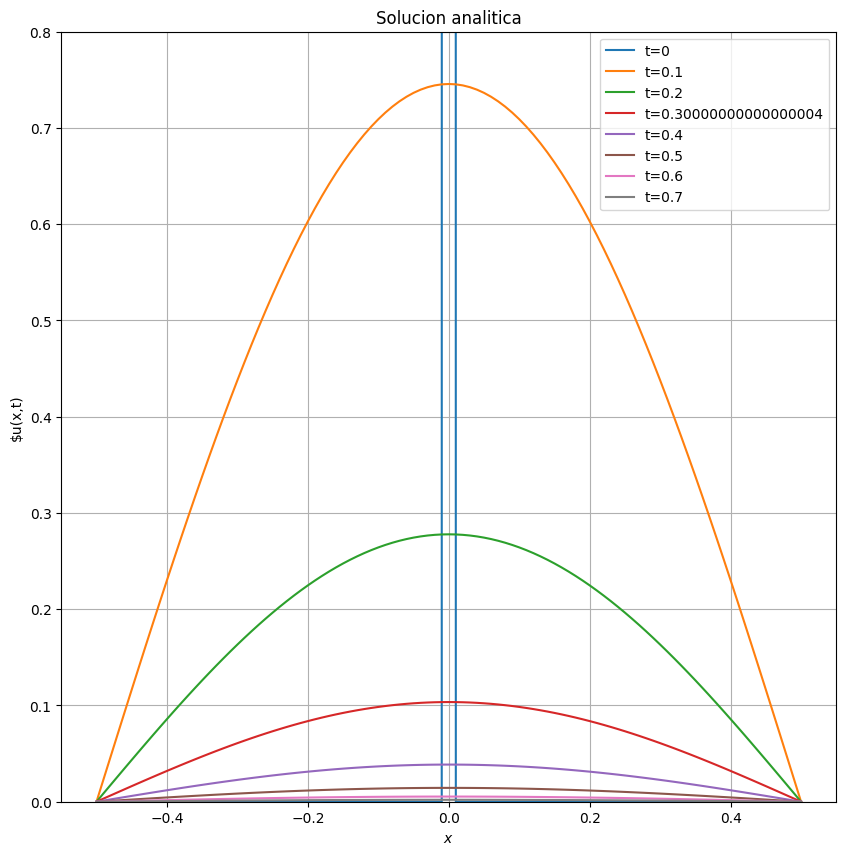

In [3]:
# implementacion prueba
L=1
a=-L/2
b=L/2
nx=101
X = np.linspace(a,b,nx)
t=0
t0=0
alpha=1
t=t0
Dt=1
params={'legend.fontsize': 5, 'legend.handlelength': 1}
plt.figure(figsize=(10,10))
plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)")
plt.title("Solucion analitica")

nplots=8
Dt=0.1
t=0


for i in range(0, nplots):
    plt.plot(X, u(X,t), label='t='+str(t))
    plt.legend(labelspacing=1, title="tiempo")
    t=t+Dt

plt.ylim(0, 0.8)
plt.legend()
plt.grid(True)
plt.show()




In [4]:
# solucion numerica
def solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f):
    # " explicar parametros "

    L=b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2*alpha)

    if (dt >= stab_cond):
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt}")
        print(f" debe ser menor que dx**2/(2*alpha)={stab_cond}")
        return

    # inicializacion
    dx = L/(nx-1)
    w = np.zeros((nx,nt))
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    X = np.linspace(a,b,nx)

    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i],dx)

    # condiciones de frontera
    for j in range(1,nt):
        w[0,j] = 0
        w[nx-1,j] = 0.0


    # evolucion en el tiempo
    for j in range(nt-1):
        # ciclo de espacio
        for i in range(1,nx-1):
            w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

    return w



In [ ]:
# prueba
alpha=1
L=1
a=-L/2
b=L/2
t0=0
dt=0.00001
nt=40001
nx=101
L=b-a

# condicion inicial Delta Dirac
def f(x,dx):
    if x==0:
        return 1/dx
    else:
        return 0

w = solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f)

In [ ]:
# graficamos
params={'legend.fontsize': 5, 'legend.handlelength': 1}

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)")
plt.title("Solucion numerica")

X = np.linspace(a,b,nx)
nsam=10000
for j in range(0, nt, nsam):
    t=j*dt
    plt.plot(X, w[:,j], label='t='+str(t))
    plt.legend(labelspacing=1, title="tiempo")

plt.ylim(0, 0.8)
plt.grid(True)
plt.show()

In [ ]:
# calculo del error
nstep=10000

Nt=int(nt/nstep)
error=np.zeros((nx, Nt))

dx = (b-a)/(nx-1)
k=0
for j in range(0, nt-1, nstep):
    t=j*dt
    for i in range(nx):
        error[i,k]=u(X[i],t)-w[i,j]
    k=k+1

# graficamos
params={'legend.fontsize': 5, 'legend.handlelength': 1}

plt.xlabel(r"$x$")
plt.ylabel(r"$error")
plt.title("Error")

X=np.linspace(a,b,nx)
for i in range(Nt):
    t = i*Dt
    plt.plot(X, error[:,i], label='t='+str(i*nstep*dt))
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()

Resolvemos

$$ u_t = \alpha u_{xx} $$
$$u(x,0) = f(x) $$
$$u_x(0,t) = u_x(L,t)=0 $$

$$f(x)=6 \sin \frac{\pi x}{L} $$



In [ ]:
# Neumann conditions
def f(x):
    return 6*sin(pi*x/L)

def solu_eq_calor_Neumann(alpha, a, b, t0, h1, h2, nt, nx, dt, f):
    " comentarios defina todas las variable"
    L=b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2*alpha)

    if (dt >= stab_cond):
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt}")
        print(f" debe ser menor que dx**2/(2*alpha)={stab_cond}")
        return

    # inicializamos la solucion
    w=np.zeros((nx,nt))
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    X = np.linspace(a,b,w.shape[0])

    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i])


    for j in range(nt-1):
        for i in range(1,nx-1):
            w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

        # condiciones de Neumann
        w[0,j+1] = w[1,j+1] - 2*dx*h1[j]
        w[nx-1,j+1] = w[nx-2,j+1] + 2*dx*h2[j]

    return  w



In [ ]:
# prueba
alpha=1
a,b=0,L
t0=0
nt=1000
dt=0.00001

h1 = np.zeros((nt))
h2 = np.zeros((nt))

nx=101
L=b-a

# condicion inicial
def f(x):
    return 6*sin(pi*x/L)

w = solu_eq_calor_Neumann(alpha, a, b, t0, h1, h2, nt, nx, dt, f)

In [ ]:
# graficamos
params={'legend.fontsize': 5, 'legend.handlelength': 1}

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)")
plt.title("Solucion numerica")

X = np.linspace(a,b,nx)
nsam=100
for j in range(0, nt, nsam):
    t=j*dt
    plt.plot(X, w[:,j], label='t='+str(t))
    plt.legend(labelspacing=1, title="tiempo")

# plt.ylim(0, 0.8)
plt.grid(True)
plt.show()



In [ ]:
# la fuente
# Neumann conditions
def f(x):
    return 6*sin(pi*x/L)

def solu_eq_calor_NeumannFuente(alpha, a, b, t0, h1, h2, nt, nx, dt, f,g):
    " comentarios defina todas las variable"
    L=b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2*alpha)

    if (dt >= stab_cond):
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt}")
        print(f" debe ser menor que dx**2/(2*alpha)={stab_cond}")
        return

    # inicializamos la solucion
    w=np.zeros((nx,nt))
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    X = np.linspace(a,b,w.shape[0])

    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i])


    for j in range(nt-1):
        for i in range(1,nx-1):
            w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j]) + \
            dt*g(X[i],t)

        # condiciones de Neumann
        w[0,j+1] = w[1,j+1] - 2*dx*h1[j]
        w[nx-1,j+1] = w[nx-2,j+1] + 2*dx*h2[j]

    return  w




In [ ]:
# prueba
alpha=1
a,b=0,L
t0=0
nt=40001
dt=0.00001

h1 = np.zeros((nt))
h2 = np.zeros((nt))

nx=101
L=b-a

# condicion inicial
def f(x):
    return 6*sin(pi*x/L)

# fuente
def g(x,t):
    return 10000000* exp(-(x-L/2)**2)
wfuente = solu_eq_calor_NeumannFuente(alpha, a, b, t0, h1, h2, nt, nx, dt, f,g)

In [ ]:
# graficamos
params={'legend.fontsize': 5, 'legend.handlelength': 1}

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)")
plt.title("Solucion numerica")

X = np.linspace (a,b,nx)
nsamp=1000
Nt=4000
for j in range(0, Nt, nsamp):
    t=j*dt
    plt.plot(X, wfuente[:,j], label='t='+str(t))
    plt.legend(labelspacing=1, title="tiempo")

# plt.ylim(0, 0.8)
plt.grid(True)
plt.show()



## continuacion con Crank-Nicholson
Reordenamos de fomra que los terminos a la izquierda son $j+1$
y a la derecha $j$


$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 j} + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} $$
donde

$\beta= \alpha \Delta t/(2 \Delta x^2)$, con error de
$$\mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t^2) $$

La molecula en la proxima figura.

Dos cosas hoy
1. Representacion matricial
2. Estabilidad incondicional.

## Representacion matricial


$i=1$:
$$-\beta w_{0 j+1} + (1 + 2 \beta) w_{1 j+1} - \beta w_{2 j+1} = \beta w_{0 j} + (1 - 2 \beta) w_{1j} + \beta w_{2 j} $$
La podemos escribir como

$$(1 + 2 \beta) w_{1 j+1} - \beta w_{2 j+1} = \beta w_{0j} + (1 - 2 \beta) w_{1j} + \beta w_{0j+1} + \beta w_{2j} $$

para $i=2$
$$-\beta w_{1 j+1} + (1 + 2 \beta) w_{2 j+1} - \beta w_{3 j+1} = \beta w_{1 j} + (1 - 2 \beta) w_{2j} + \beta w_{3 j} $$

y asi hasta
$i=n-2$

$$-\beta w_{n-3 j+1} + (1 + 2 \beta) w_{n-2 j+1} - \beta w_{n-1 j+1} = \beta w_{n-1 j} + (1 - 2 \beta) w_{n-2j} + \beta w_{n-1 j} $$

Finalmente para $i=n-1$

$$-\beta w_{n-2 j+1} + (1 + 2 \beta) w_{n-1 j+1} - \beta w_{n j+1} = \beta w_{n-2 j} + (1 - 2 \beta) w_{n-1j} + \beta w_{n j} $$

Reescribo la anterior
$$-\beta w_{n-2 j} + (1 + 2 \beta) w_{n-1 j+1} = \beta w_{n-2 j} + (1- 2 \beta) w_{n-1 j} + \beta w_{nj} + \beta w_{n j+1} $$

La matriz queda


\begin{eqnarray}
\begin{pmatrix}
1 + 2 \beta & -\beta & 0 & \cdots & \cdots & 0 \\
-\beta & 1 + 2 \beta & -\beta &  \ddots & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots  & \ddots & \ddots & \ddots & \ddots &  \vdots  \\
0 & \cdots & \cdots & 0 & -\beta & 1 + 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j+1} \\ w_{2 j+1} \\ \vdots \\ w_{n-2 j+1} \\ w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \beta & \beta & 0 & \cdots & \cdots & 0 \\
\beta & 1 - 2 \beta & \beta &  \ddots & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots  & \ddots & \ddots & \ddots & \ddots &  \vdots  \\
0 & \cdots & \cdots & 0 & \beta & 1 - 2 \beta
\end{pmatrix}
+ \beta
\begin{pmatrix}
w_{0 j+1} + w_{0j} \\ 0 \\0 \\ \vdots \\ 0 \\ w_{nj} + w_{n j+1}
\end{pmatrix}
\end{eqnarray}

## Analisis de estabilidad

El metodo de Crank-Nicholson es incondicionalmente estable.
Veamos la prueba.
$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 j} + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} \tag{1} $$

Recuerden que el metodo de Neumann (John Von) para identificar estabilidad en un sistema de diferencias finitas es asumir la
solucion de forma

$$ w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}\tag{2} $$
El factor de ganancia $G$ es el valor de hoy divido el valor de ayer.

$$ G = \frac{w_{i j+1}}{w_{ij}} = \mathrm{e}^{\alpha \Delta t} $$

Si reemplazaos $w_{ij}$ de la Ecuacion (2) en la ecuacion (1)

$$\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i}} $$


$$ -\beta   
\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} x_{i-1}}
+ (1 + 2 \beta)
\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} x_{i}}
- \beta
\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} x_{i+1}}
= \beta
\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i-1}}
+ (1 - 2 \beta)
\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i}}
+ \beta
\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} x_{i+1}}
  $$

Para obtener $G$ dividismo por $w_{ij}$




$$ -\beta   
\mathrm{e}^{\alpha \Delta t} \mathrm{e}^{-\mathrm{i} \Delta x}
+ (1 + 2 \beta)
\mathrm{e}^{\alpha \Delta t}
- \beta
\mathrm{e}^{\alpha \Delta t} \mathrm{e}^{\mathrm{i} \Delta x}
= \beta
\mathrm{e}^{-\mathrm{i} \Delta x}
+ (1 - 2 \beta)
+ \beta
\mathrm{e}^{\mathrm{i} \Delta x}
$$


$$ -\beta   
G \mathrm{e}^{-\mathrm{i} \Delta x}
+ (1 + 2 \beta)  G
- \beta
 G \mathrm{e}^{\mathrm{i} \Delta x}
= \beta
\mathrm{e}^{-\mathrm{i} \Delta x}
+ (1 - 2 \beta)
+ \beta
\mathrm{e}^{\mathrm{i} \Delta x}
$$

Despejamos $G$

$$G = $$


Usando que
$$\mathrm{e}^{\mathrm{i} \theta} + \mathrm{e}^{-\mathrm{i} \theta} = 2 \cos \theta$$
encontramos

$$G = \frac{1 - 2 \beta + 2 \beta \cos k \Delta x}{1 + 2 \beta - 2 \cos k \Delta x}= \frac{1 - 4 \beta \sin^2 \frac{k \Delta x}{2} }{ 1 + 4 \beta \sin^2 \frac{k \Delta x}{2}}  $$

El denominador suma y el numerador resta. El denominador **siempre** es mas grande (o igual) que el numerador
y entonces $|G|  <= 1$. O sea que el sistema es incondicionalmente estable.

El algoritmo  es:

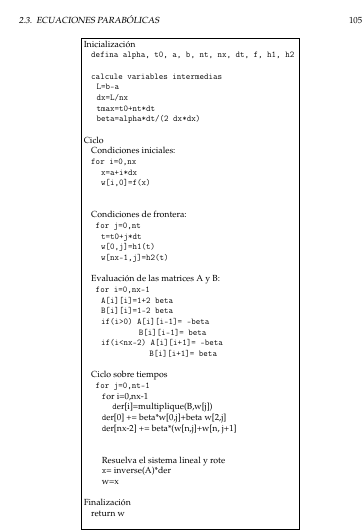

In [ ]:
# implementacion
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg


def solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f):
    # defina variables
    L = float(b-a)
    dx = L/(nx-1)
    beta=0.5*alpha*dt/dx**2

    tmax=nt*dt + t0
    t=np.arange(t0, tmax, dt)

    # inicialice w
    w = np.zeros((nx, nt))
    X=np.linspace(a, b, nx)

    print("dimensiones de w", w.shape)

    # condiciones de frontera
    for j in range(nt):
        w[0, j] = 0
        w[nx-1, j] = 0

    # vcector de la derecha
    rhs = np.zeros(nx-2)

    # inicializacion de A, B, b
    A = np.zeros([nx-2, nx-2])
    B = np.zeros([nx-2, nx-2])
    b = np.zeros(nx-2)

    # condicion inicial
    w[:, 0] = np.asarray([f(xx) for xx in X]) #previously np.array()

    # lleno de matrices A,B
    # OJOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
    for i in range(nx-2):  # had a range(1:nx-2)
        A[i][i] = 1.0 + 2*beta
        B[i][i] = 1.0 - 2*beta
        if i>0 :
            A[i][i-1] = -beta
            B[i][i-1] = beta
        if i<nx-3:
            A[i][i+1] = -beta
            B[i][i+1] = beta
        b[0] = beta*(w[0,1] + w[0,0])
        b[nx-3] = beta*(w[nx-1, 1] + w[nx-1,0])

        rhs = B.dot(w[1:-1, 0]) + b

    # print matrices A, B, b for verification
    print("A", A)
    print("\n"*4)
    print("B", B)
    # ciclo sobre tiempos
    for j in range(0, nt-1):

        # resuelve Au_w j+1 = B w_j
        x = linalg.solve(A, rhs)

        # actualiza w
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

        b[0] = beta*(w[0,j+1] + w[0,j])
        b[nx-3] = beta*(w[nx-1,j] + w[nx-1,j+1])

    return w







In [ ]:
# prueba
alpha=1
a=0
b=1
nt=40001
nx=101
dt=0.00001
t0=0
x0=0
L=b-a

def f(x):
    return 6*np.sin(np.pi*x/L)

w=solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)

In [ ]:
# graficar
params={'legend.fontize':5, 'legend.handlength':1}

Ndt=10000
plt.xlabel(r"$x$")
plt.ylabel(r"calor")
plt.title(r'Curvas de calor. Solucion numerica')

X = np.linspace(a, b, nx)

for j in range(0,nt,Ndt):
    t=j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()